## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 1: Naive Bayes
### Total Points: 100 points

You will be dealing with movie review data that includes both positive and negative reviews in this assignment. You will use Sentiment Analysis to assess if a given review is positive or negative using the provided dataset.

Therefore, we will make use of Naive Bayes algorithm to perform sentiment analysis on the movie review dataset.

## Importing the Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Reading the data

When reading the data, ensure that the '.csv' file is in the same location where your jupyter notebook is used. This way the files are organized and easy to read using the pandas library. 

In [2]:
## Reading the data and removing columns that are not important. 
df = pd.read_csv("movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [3]:
df.head(5)  # print head of data frame with help of head function

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


## Count plot of the output categories: positive or negative

Feel free to take a look at the output and whether the classes are balanced or imbalanced. 

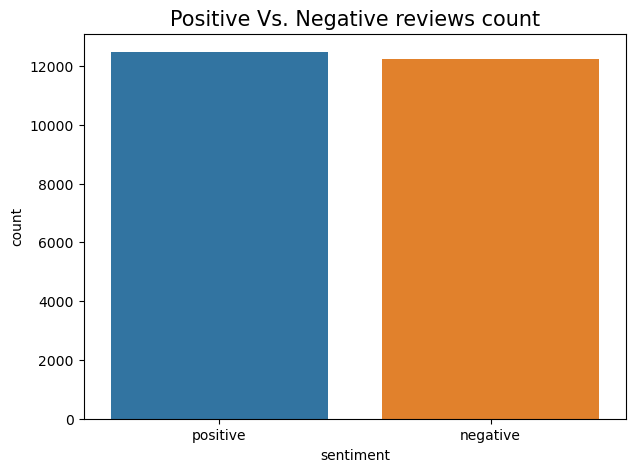

In [4]:
plt.figure(figsize = (7,5))
sns.countplot(x=df['sentiment'], data = df['sentiment'])
plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()

We see that the number of positive reviews is slightly higher than negative reviews, 
So we can say that the data is imbalanced.

## Upsampling the minority class: (5 points)

It is known that Naive bayes is not robust to class imbalance. It could be seen above that the data is little imbalanced. Therefore, class balancing can be done before giving it to the Naive Bayes model for prediction. 

Feel free to use 'resample' library from sklearn. 

In [5]:
## hint: use resample from sklearn.utils
from sklearn.utils import resample

df_majority = df[df['sentiment']=="positive"]
df_minority = df[df['sentiment']=="negative"]

negative_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)

df_upsampled = pd.concat([df_majority, negative_upsample])  # concatenate two data frames i,e majority class data set and upsampled minority class data set
df_upsampled = df_upsampled.sample(frac = 1) # shuffling data rows

In [6]:
## Just to ensure that upsampling was done successfully, take a look at the shape of the data in 
## this cell. 

# print the shape of data set with the help of shape function having "negative" as class label
df_upsampled[df_upsampled['sentiment'] == "negative"].shape


(12474, 2)

### Expected Output : 
(12474, 2)

In [7]:
## Ensure that the same number of data points are present for both 'positive' and 'negative' data

# print the shape of data set with the help of shape function having "positive" as class label
df_upsampled[df_upsampled['sentiment'] == "positive"].shape


(12474, 2)

### Expected Output : 
(12474, 2)

In [8]:
## In this cell, we are going to be dividing the data into train and test points
## Ensure that you store the upsampled data in a variable called 'df_upsampled' 
## so that the below operations are performed successfully


## Considering 10000 positive and 10000 negative data points
negative_data_points_train = df_upsampled[df_upsampled['sentiment']=="negative"].iloc[:10000]
positive_data_points_train = df_upsampled[df_upsampled['sentiment']=="positive"].iloc[:10000]

## Considering the remaining data points for test
negative_data_points_test = df_upsampled[df_upsampled['sentiment']=="negative"].iloc[10000:]
positive_data_points_test = df_upsampled[df_upsampled['sentiment']=="positive"].iloc[10000:]

## Concatenate the training positive and negative reviews
X_train = pd.concat([positive_data_points_train['review'], negative_data_points_train['review']])
## Concatenating the training positive and negative outputs
y_train = pd.concat([positive_data_points_train['sentiment'], negative_data_points_train['sentiment']])

## Concatenating the test positive and negative reviews
X_test = pd.concat([positive_data_points_test['review'], negative_data_points_test['review']])
## Concatenating the test positive and negative outputs
y_test = pd.concat([positive_data_points_test['sentiment'], negative_data_points_test['sentiment']])


In [9]:
## Take a look at the total number of classes and their count using '.value_counts()' for y_train and y_test.
## Ensure that there are equal number of positive and negative reviews. 
y_train.value_counts() 

positive    10000
negative    10000
Name: sentiment, dtype: int64

### Expected Output:
negative    10000<br>
positive    10000<br>
Name: sentiment, dtype: int64

In [10]:
y_test.value_counts()

positive    2474
negative    2474
Name: sentiment, dtype: int64

### Expected Output : 
negative    2474<br>
positive    2474<br>
Name: sentiment, dtype: int64

## Q1. Pre-process the reviews: (10 points)

We know that a review contains links, punctuation, stopwords and many other words that don't give a lot of meaning for the Naive Bayes model for prediction. 

In the cell below, one must implement text-preprocessing and remove links, punctuations and stopwords. It is also important to lowercase the letters so that 'Admire' and 'admire' are not treated as different words. 

In addition to this, perform stemming operation so that similar words are reduced. To know more about stemming, feel free to take a look at this link.

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [11]:
# TASK CELL

def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    #conversion to lower case
    review = review.lower()
    
    #Removal of html tags
    pattern = re.compile('<.*?>')
    review = pattern.sub(r'', review)
    
    #Removal of URLs
    pattern = re.compile(r'https?://\S+|www\.\S+')
    review = pattern.sub(r'', review)
    
    #Removal of punctuation
    import string
    exclude= string.punctuation
    review = review.translate(str.maketrans('', '', exclude))
    
    #Removal of stop words
    from nltk.corpus import stopwords
    stopword = nltk.corpus.stopwords.words('english')
    review = " ".join([word for word in re.split('\W+', review) if word not in stopword])
    
    #Tokenization
    from nltk.tokenize import word_tokenize
    review = word_tokenize(review)
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    review_cleaned = " ".join([ps.stem(word) for word in review])
        
    return review_cleaned

## Q2. Implement a find_occurrence function (5 points):

In this function, we find the total occurrence of a word giving information such as label, word and frequency dictionary.

Note that this function is used later in the code when we are going to be predicting the output using Naive Bayes. 

In [12]:
# TASK CELL
def find_occurrence(frequency, word, label):
    '''
    Params:
        frequency: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Return:
        n: the number of times the word with its corresponding label appears.
    '''
    n = 0  # Initialize a count to zero
    
    # Check if the word-label pair exists in the frequency dictionary
    if (word, label) in frequency:
        n = frequency[(word, label)]  # Get the count from the dictionary
  
    return n

### Converting output to numerical format:

We have outputs as 'positive' or 'negative'. In the cell below, we convert it to a numerical format. 

In [13]:
## With the use of mapping function, we replace
## the label in the form of string to an integer. 

output_map = {'positive': 0, 'negative': 1}
y_train = y_train.map(output_map)
y_test = y_test.map(output_map)

In [14]:
## Ensuring that there are equal number of classes on the training data. 
y_train.value_counts()

0    10000
1    10000
Name: sentiment, dtype: int64

In [15]:
## Choosing a random review and taking a look at it.
X_train.iloc[0]

"If you are looking for a movie that doesn't take itself seriously... than Haggard is for you. I must say before i write anything more, that if you have not seen any of the CKY (Camp Kill Yourself) videos than the movie most likely won't be AS funny. My advice is to watch a few clips of those videos that Bam and his friends made. Haggard does not take itself seriously AT all, and that was never the purpose. Throughout the movie you will have random moments that have nothing to do with the plot, which may get annoying but its nothing that is out of control. Even through all that the plot does stay focused and the story of Ryan Dunn's character does unfold quite nicely. This plot i have been told is based off a true story (for the most part)of Ryan Dunn's ex-girlfriend. Brandon Dicamillo is by far the best character in the movie. He has a lot of talent and knows how to make people laugh. He stole the movie if you ask me. Overall I love this movie for its simplicity and straight up weirdn

From the above cell output, it could be seen that there are a lot of words that don't add a lot of meaning to the text. 

Therefore, those words would be removed. It also reduces the computation time. 

Therefore, it is a good practice we are following.

In [16]:
custom_review = X_train.iloc[0]

# print cleaned review
print(clean_review(custom_review))

look movi doesnt take serious haggard must say write anyth seen cki camp kill video movi like wont funni advic watch clip video bam friend made haggard take serious never purpos throughout movi random moment noth plot may get annoy noth control even plot stay focus stori ryan dunn charact unfold quit nice plot told base true stori partof ryan dunn exgirlfriend brandon dicamillo far best charact movi lot talent know make peopl laugh stole movi ask overal love movi simplic straight weird bam movi peopl go normal haggard fill hilari quot friend constantli use sinc first time saw ive seen movi 67 time still find new thing everi time soundtrack good everyth gnar kill new order techno dont go movi high expect let unfold judg


We now use this function to pre-process the review and remove words that don't add a lot of meaning in our model. 

## Q3. Implementing review counter function: (5 points)

It is now time to implement the count function for the reviews. 

In this function, we count the occurrence of words and get the probabilities 
for the words based on the training data. 

In other words, we get the probability of occurrence of a word, given that the output is 'positive'.

Similarly, we also compute the probability of occurence of a word, given that the output is 'negative'.



In [17]:
# TASK CELL
def review_counter(output_occurrence, reviews, positive_or_negative):
    '''
    Params:
        output_occurrence: a dictionary that will be used to map each pair to its frequency
        reviews: a list of reviews
        positive_or_negative: a list corresponding to the sentiment of each review (either 0 or 1)
    Return:
        output: a dictionary mapping each pair to its frequency
    '''
    ## Steps :
    # define the key, which is the word and label tuple
    # if the key exists in the dictionary, increment the count
    # else, if the key is new, add it to the dictionary and set the count to 1
    
    for label, review in zip(positive_or_negative, reviews):
      split_review = clean_review(review).split()
      for word in split_review:
            key = (word, label)
            
            # Check if the key exists in the output_occurrence dictionary
            if key in output_occurrence:
                output_occurrence[key] += 1  # Increment the count
            else:
                output_occurrence[key] = 1  # Initialize the count to 1 for a new key
   
    return output_occurrence
   


### Test your function with example reviews:

Feel free to run the cell below and understand whether the above function that you have defined is producing the optimum results. 

In [18]:
# Testing your function

result = {}
reviews = ['got bored throught the moview', 'The movie was fantastic', 'Will not watch it again', 'Was bored, it was a complete waste of time and money', 'Enjoyed the movie to the fullest']
ys = [1, 0, 1, 1, 0]
review_counter(result,reviews, ys)

{('got', 1): 1,
 ('bore', 1): 2,
 ('throught', 1): 1,
 ('moview', 1): 1,
 ('movi', 0): 2,
 ('fantast', 0): 1,
 ('watch', 1): 1,
 ('complet', 1): 1,
 ('wast', 1): 1,
 ('time', 1): 1,
 ('money', 1): 1,
 ('enjoy', 0): 1,
 ('fullest', 0): 1}

### Expected Output:
 {('bored', 1): 2, <br>
 ('complete', 1): 1, <br>
 ('enjoyed', 0): 1, <br>
 ('fantastic', 0): 1, <br>
 ('fullest', 0): 1, <br>
 ('got', 1): 1, <br>
 ('money', 1): 1, <br>
 ('movie', 0): 2, <br>
 ('moview', 1): 1, <br>
 ('throught', 1): 1, <br>
 ('time', 1): 1, <br>
 ('waste', 1): 1, <br>
 ('watch', 1): 1}

In [19]:
# Build the freqs dictionary for later uses

freqs = review_counter({}, X_train, y_train)

In [20]:
## Run this cell to get an idea about the corpus of words and their occurrence along with labels. 
## In this, we are computing the frequency of occurrence of word given that a review is 'positive'.
## Similarly, we also compute the frequence of occurence of word given that a review is 'negative'.
freqs

{('look', 0): 3142,
 ('movi', 0): 17372,
 ('doesnt', 0): 1486,
 ('take', 0): 2743,
 ('serious', 0): 285,
 ('haggard', 0): 11,
 ('must', 0): 1285,
 ('say', 0): 2586,
 ('write', 0): 604,
 ('anyth', 0): 837,
 ('seen', 0): 2668,
 ('cki', 0): 11,
 ('camp', 0): 219,
 ('kill', 0): 1063,
 ('video', 0): 533,
 ('like', 0): 7968,
 ('wont', 0): 529,
 ('funni', 0): 1595,
 ('advic', 0): 66,
 ('watch', 0): 5041,
 ('clip', 0): 92,
 ('bam', 0): 30,
 ('friend', 0): 1395,
 ('made', 0): 2866,
 ('never', 0): 2532,
 ('purpos', 0): 203,
 ('throughout', 0): 562,
 ('random', 0): 89,
 ('moment', 0): 1184,
 ('noth', 0): 976,
 ('plot', 0): 1939,
 ('may', 0): 1543,
 ('get', 0): 5025,
 ('annoy', 0): 217,
 ('control', 0): 281,
 ('even', 0): 3797,
 ('stay', 0): 416,
 ('focus', 0): 204,
 ('stori', 0): 5485,
 ('ryan', 0): 173,
 ('dunn', 0): 55,
 ('charact', 0): 5464,
 ('unfold', 0): 141,
 ('quit', 0): 1707,
 ('nice', 0): 987,
 ('told', 0): 491,
 ('base', 0): 645,
 ('true', 0): 1043,
 ('partof', 0): 1,
 ('exgirlfriend',

## Q4. Training the Naive Bayes Model: (20 points)

Now we are in the training phase of the Naive Bayes algorithm. In this cell, take a look at the ways to calculate the log likelihood and log prior values as these are important for testing in the next few cells. 

Also calculate the frequency of occurrence of words where the output is negative. In the same way, calculate the word frequency count using the above functions in order to compute the log likelihood.

Return the logprior and loglikelihood output by the model from this function. 

In [21]:
import numpy as np

def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of reviews
        train_y: a list of labels corresponding to the reviews (0 for positive, 1 for negative)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of your Naive Bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0

    # Calculate V, the number of unique words in the vocabulary
    vocab = set(word for word, label in freqs.keys())
    V = len(vocab)

    # Calculate num_pos and num_neg - the total number of positive and negative words for all documents
    num_pos = num_neg = 0
    for pair, count in freqs.items():
        word, label = pair
        if label == 0:  #label convention (0 for positive, 1 for negative)
            num_pos += count
        else:
            num_neg += count

    # Calculate num_doc, the number of documents
    num_doc = len(train_y)

   # Calculate D_pos, the number of positive documents
    pos_num_docs = sum(1 for label in train_y if label == 0) 

    # Calculate D_neg, the number of negative documents
    neg_num_docs = num_doc - pos_num_docs

    # Calculate logprior
    logprior = np.log(pos_num_docs / neg_num_docs)

    # For each word in the vocabulary...
    for word in vocab:
        # Get the positive and negative frequency of the word
        freq_pos = freqs.get((word, 0), 0)  
        freq_neg = freqs.get((word, 1), 0)  

        # Calculate the probability that each word is positive and negative
        p_w_pos = (freq_pos + 1) / (num_pos + V)  # Laplace smoothing
        p_w_neg = (freq_neg + 1) / (num_neg + V)  # Laplace smoothing

        # Calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)

    return logprior, loglikelihood


In [22]:
sum(y_train)

10000

In [23]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)
print(logprior)
print(len(loglikelihood))

0.0
88784


### Expected Output 

0.0 <br>
91425

## Q5. Implementing Naive Bayes Predict Function: (10 points)

It is now time to make our prediction as to whether a given review is negative or positive respectively. 

After adding the log likelihood values, ensure that the output is 1 (negative) if the sum of the log likelihood value is greater than 0 and 0 (positive) if the sum of the log likelihood is less than or equal to 0. 

In [24]:
def naive_bayes_predict(review, logprior, loglikelihood):
    '''
    Params:
        review: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Return:
        total_prob: the sum of all the loglikelihoods of each word in the review (if found in the dictionary) + logprior (a number)
    '''
    
    # Process the review to get a list of words
    word_l = clean_review(review).split()  # Split the review into words

    # Initialize probability to zero
    total_prob = 0

    # Add the logprior
    total_prob += logprior

    for word in word_l:

        # Check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # Add the log likelihood of that word to the probability
            total_prob += loglikelihood[word]
    #Rounding total_prob to 1(negative) or 0(positive)        
    if total_prob < 0:
        total_prob = 1
    else:
        total_prob = 0
    return total_prob


In [25]:
#testing the output with my review
my_review = "If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!! "
p = naive_bayes_predict(my_review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 0


In [26]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Experiment with your own review.
my_review = "I thought this series was going to be another fun, action series with some dynamic plots and great performances. I was wrong. While I like Jamie Denton, this show is hardly worth watching at all, unless you enjoy watching some people brutalized and the actions of the agents supposedly warranted under the theme of national security. The show is great propaganda for the current government, and spews out jingoism as though we talk that way every day. After a couple of episodes, it was boring the hell out of me, and I started watching reruns of House Invaders on BBCAmerica instead. Rather watch CSI and Without a Trace, without a doubt."
p = naive_bayes_predict(my_review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1


### Expected Output :
The expected output is 1

## Q6. Implementing Naive Bayes Test function: (10 points)

In this function, implement the previous functions such as naive_bayes_predict to get the predictions for the test set. 

In addition to this, the function should return the total number of reviews that it correctly classified as 'positive' or 'negative'. 

In [27]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of reviews
        test_y: the corresponding labels for the list of reviews
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of reviews classified correctly)/(total # of reviews)
    """
    accuracy = 0  
    y_hats = []

    for review in test_x:
        # Initialize the probabilities for both classes
        pos_prob = 0
        neg_prob = 0

        # Split the review into words
        word_l = review.split()

        for word in word_l:
            # Check if the word exists in the loglikelihood dictionary
            if word in loglikelihood:
                # Add the log likelihood of that word to the probabilities
                pos_prob += loglikelihood[word]
                neg_prob += loglikelihood[word]

        # Add the logprior to the probabilities
        pos_prob += logprior
        neg_prob += logprior

        # Make a prediction based on which class has higher probability
        if pos_prob > neg_prob:
            y_hat_i = 0  # Predict positive (0)
        else:
            y_hat_i = 1  # Predict negative (1)

        # Append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # Calculate accuracy by comparing predicted labels (y_hats) to true labels (test_y)
    correct_predictions = sum(1 for y_hat, y_true in zip(y_hats, test_y) if y_hat == y_true)
    total_predictions = len(test_y)
    accuracy = correct_predictions / total_predictions

    return accuracy


In [28]:
# For grading purpose only
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Run this cell to test your function

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = naive_bayes_predict(review, logprior, loglikelihood)
    print(f'{review[:100]} -> {p:.2f}')
    

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 0.00
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00


### Expected Output :

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 0.00 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00<br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00



In [29]:
# Feel free to check the sentiment of your own review below
my_review = 'The moview was very boring, I wanted to leave in the middle'
naive_bayes_predict(my_review, logprior, loglikelihood)

1

### Expected Output :
1

# Q7. Evaluate the accuracy (10 Points)
1. Split your data into training and test sets using random selection. Set the seed as parameter of the function so that user can select a different training and test set by changin seed.

2. Calculate model paramters with training set.

3. Print confusion matrix for training and test set.

4. Examine False Positive and False Negative cases and provide reasoning why they get misclassified.

In [30]:
import random
from sklearn.model_selection import train_test_split
def split(data, seed):
    '''
    Split the data into training and test sets using random selection with seed as an input parameter.

    Input:
        data: Dataframe containing reviews
        seed: seed value for generating a random number
    Output:
        train_x: a list of reviews for the training set
        train_y: a list of labels correponding to the reviews for the training set
        test_x: a list of reviews for the test set
        test_y: a list of labels correponding to the reviews for the test set
    '''

    # Shuffling the data
    random.seed(seed)
    df_majority = df[df['sentiment'] == 'positive']
    df_minority = df[df['sentiment'] == 'negative']

    negative_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = seed)

    df_upsampled = pd.concat([df_majority, negative_upsample])  # concat two data frames i,e majority class data set and upsampled minority class data set
    df_upsampled = df_upsampled.sample(frac = 1)

    ## Considering 10000 positive and 10000 negative data points
    negative_data_points_train = df_upsampled[df_upsampled['sentiment'] == 'negative'].iloc[:10000]
    positive_data_points_train = df_upsampled[df_upsampled['sentiment'] == 'positive'].iloc[:10000]

    ## Considering the remaining data points for test
    negative_data_points_test = df_upsampled[df_upsampled['sentiment'] == 'negative'].iloc[10000:]
    positive_data_points_test = df_upsampled[df_upsampled['sentiment'] == 'positive'].iloc[10000:]

    ## Concatenate the training positive and negative reviews
    X_train = pd.concat([positive_data_points_train['review'], negative_data_points_train['review']])
    ## Concatenating the training positive and negative outputs
    y_train = pd.concat([positive_data_points_train['sentiment'], negative_data_points_train['sentiment']])

    ## Concatenating the test positive and negative reviews
    X_test = pd.concat([positive_data_points_test['review'], negative_data_points_test['review']])
    ## Concatenating the test positive and negative outputs
    y_test = pd.concat([positive_data_points_test['sentiment'], negative_data_points_test['sentiment']])

    return X_train, y_train, X_test, y_test

# Data split
train_x, train_y, test_x, test_y = split(df, 101)

# converting y variable to 0 and 1
output_map = {'positive': 0, 'negative': 1}
y_train = train_y.map(output_map)
y_test = test_y.map(output_map)

In [31]:
#Model parameters from training set
freqs = review_counter({}, train_x, y_train)
logprior, loglikelihood = train_naive_bayes(freqs, train_x, y_train)
print(logprior)
print(len(loglikelihood))

0.0
88520


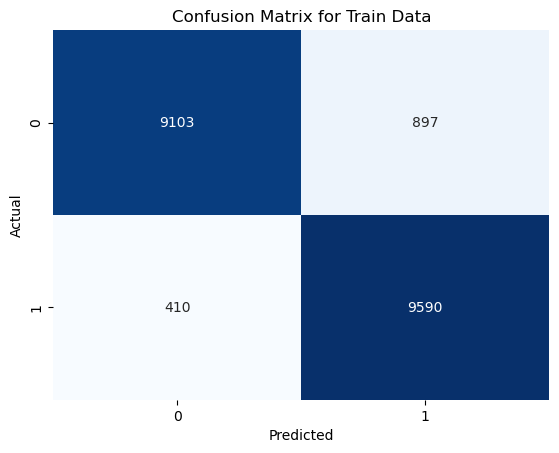

In [32]:
#Confusion matrix for train dataset
from sklearn.metrics import confusion_matrix
predicted_labels = [naive_bayes_predict(review, logprior, loglikelihood) for review in train_x]
confusion = confusion_matrix(y_train.tolist(), predicted_labels)
plt.figure(figsize = None)
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Train Data")
plt.show()

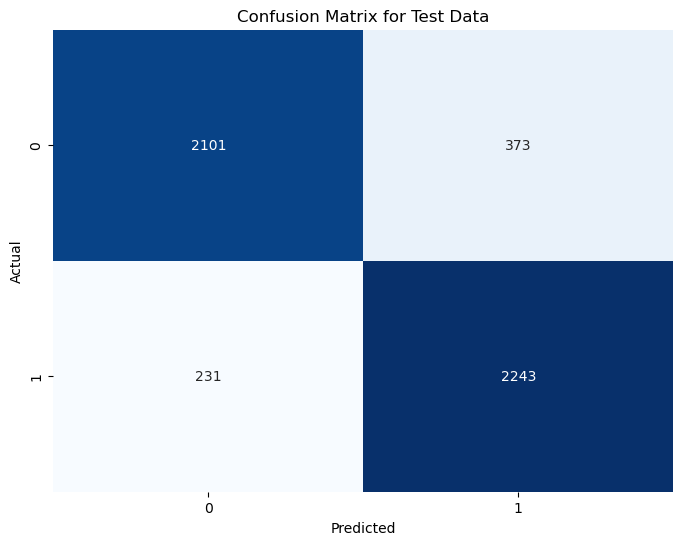

In [33]:
# Confusion matrix for test dataset.
test_predicted_labels = [naive_bayes_predict(review, logprior, loglikelihood) for review in test_x]
confusion = confusion_matrix(y_test.tolist(), test_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Data")
plt.show()

In [34]:
#Evaluating false positive and false negative cases
# We first find the False Positives and the False Negatives
false_positive_indices = []
false_negative_indices = []
for i in range(len(y_test)):
    if y_test.iloc[i] == 1 and test_predicted_labels[i] == 0:
        false_positive_indices.append(i)
    elif y_test.iloc[i] == 0 and test_predicted_labels[i] == 1:
        false_negative_indices.append(i)

# Retreive the corresponding misclassified reviews
false_positive_reviews = [test_x.iloc[i] for i in false_positive_indices]
false_negative_reviews = [test_x.iloc[i] for i in false_negative_indices]

# Printing the Misclassified reviews
print("False Positive Cases:")
for i, review in enumerate(false_positive_reviews):
    print(f"Review: {review}")
    print(f"Predicted Label: {test_predicted_labels[false_positive_indices[i]]}")
    print(f"Actual Label: {y_test.iloc[false_positive_indices[i]]}")
    print()

print("False Negative Cases:")
for i, review in enumerate(false_negative_reviews):
    print(f"Review: {review}")
    print(f"Predicted Label: {test_predicted_labels[false_negative_indices[i]]}")
    print(f"Actual Label: {y_test.iloc[false_negative_indices[i]]}")
    print()

False Positive Cases:
Review: When this cartoon first aired I was under the impression that it would be at least half way descent, boy was I wrong. I must admit watching this cartoon is almost as painful as watching Batman and Robin with George Clooney all those years ago. I watched a few episodes and two of them had Batman literally get his ass kicked left and right by the Penguin who fought like Jet Li and beat the crap out of Batman and I watched another episode where Batman got his butt kicked again by the Joker, who apparently was using Jackie Chan moves while flipping in the air like a ninja. Since when were the Joker or the Penguin ever a match for Batman ? and worse yet when were Joker and Penguin Kung Fu counterparts of Jackie Chan and Jet Li. It's truly embarrassing, depressing and sad the way the image of Batman is portrayed in this show. The animation is awful and the dialog is terrible. Being a Batman fan since my boyhood I can honestly and strongly advise you to stay away

Observation: In general if we look at the reviews that were classified wrongly, we understand that these reviews are
not straight forward and they contain some kind of problems involved for a machine learning model to find it difficult to understand without proper context.
Some reasons that I find to be causing a problem for the model are:
1. Complex use of language
2. Some of the reviews just summarize the whole story before stating their opinion which introduces bias
3. Choice of words
4. Mostly neutral reviews
5. The model sometimes fails to analyze language nuances like sarcastic use of few words or phrases.

# Q8. Modularize your calssifier (10 points)
1. Convert your code into a python module text_classifier.py

2. The user should be able to launch the application on command prompt using python test_classifier.py command. The module will automatically load the model paramters from a local file of your choice and be ready to take the input from user on command prompt. The program will preprocess user input, tokenize and predict the class.

3. Your module will take the input from user and output sentiment class in an indefinite loop. The output should printout the probabilities for each input token along with the final classification decision. Program will quit if user enters X.


In [ ]:
import numpy as np
import math
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import pickle

warnings.filterwarnings("ignore")
import string
nltk.download('stopwords')

def wordTokenizer(val):
    return word_tokenize(val)

def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    #Converting the text to lower case
    review = review.lower()
    #Removing URL's that begin with a http and www
    review = re.sub(r"http\S+", "", review) 
    review = re.sub(r"www.\S+", "", review)
    #Removing punctuations
    review = "".join([char for char in review if char not in string.punctuation])
    #Removing stopwords
    predefined_stopword = nltk.corpus.stopwords.words('english')
    review = " ".join([word for word in re.split('\W+', review) if word not in predefined_stopword])
    #Tokenizing using the word tokenizer function
    review = wordTokenizer(review)
    #Stemming using the Porter Stemmer
    porter = nltk.PorterStemmer()
    review_cleaned = " ".join([porter.stem(word) for word in review])
    
    return review_cleaned

def generate_model():
    ## Reading the data and removing columns that are not important. 
    df = pd.read_csv("movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
    df_majority = df[df['sentiment'] == 'positive']
    df_minority = df[df['sentiment'] == 'negative']
    
    negative_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)
    
    df_upsampled = pd.concat([df_majority, negative_upsample])  
    # concat two data frames i,e majority class data set and upsampled minority class data set
    df_upsampled = df_upsampled.sample(frac = 1)
    
    ## Considering 10000 positive and 10000 negative data points
    negative_data_points_train = df_upsampled[df_upsampled['sentiment'] == 'negative'].iloc[:10000]
    positive_data_points_train = df_upsampled[df_upsampled['sentiment'] == 'positive'].iloc[:10000]

    ## Considering the remaining data points for test
    negative_data_points_test = df_upsampled[df_upsampled['sentiment'] == 'negative'].iloc[10000:]
    positive_data_points_test = df_upsampled[df_upsampled['sentiment'] == 'positive'].iloc[10000:]

    ## Concatenate the training positive and negative reviews
    X_train = pd.concat([positive_data_points_train['review'], negative_data_points_train['review']])
    ## Concatenating the training positive and negative outputs
    y_train = pd.concat([positive_data_points_train['sentiment'], negative_data_points_train['sentiment']])

    ## Concatenating the test positive and negative reviews
    X_test = pd.concat([positive_data_points_test['review'], negative_data_points_test['review']])
    ## Concatenating the test positive and negative outputs
    y_test = pd.concat([positive_data_points_test['sentiment'], negative_data_points_test['sentiment']])
    
    def find_occurrence(frequency, word, label):
        '''
        Params:
            frequency: a dictionary with the frequency of each pair (or tuple)
            word: the word to look up
            label: the label corresponding to the word
        Return:
            n: the number of times the word with its corresponding label appears.
        '''
        if (word, label) in frequency:
            n = frequency[(word, label)]
        else:
            n = 0
        return n
    
    output_map = {'positive': 0, 'negative': 1}
    y_train = y_train.map(output_map)
    y_test = y_test.map(output_map)
    
    def review_counter(output_occurrence, reviews, positive_or_negative):
        '''
        Params:
            output_occurrence: a dictionary that will be used to map each pair to its frequency
            reviews: a list of reviews
            positive_or_negative: a list corresponding to the sentiment of each review (either 0 or 1)
        Return:
            output: a dictionary mapping each pair to its frequency
        '''
        ## Steps :
        # define the key, which is the word and label tuple
        # if the key exists in the dictionary, increment the count
        # else, if the key is new, add it to the dictionary and set the count to 1

        for label, review in zip(positive_or_negative, reviews):
          split_review = clean_review(review).split()
          for word in split_review:
            # Your code here
            # key contains the word and label tuple
            key = (word, label)

            # If the key exists in the dictionary, increment the count
            if key in output_occurrence:
                output_occurrence[key] += 1
            # Else, add it to the dictionary and set the count to 1
            else:
                output_occurrence[key] = 1

        return output_occurrence
    
    freqs = review_counter({}, X_train, y_train)
    
    def train_naive_bayes(freqs, train_x, train_y):
        '''
        Input:
            freqs: dictionary from (word, label) to how often the word appears
            train_x: a list of reviews
            train_y: a list of labels correponding to the reviews (0,1)
        Output:
            logprior: the log prior. (equation 3 above)
            loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
        '''
        loglikelihood = {}
        logprior = 0


        # calculate V, the number of unique words in the vocabulary
        vocab = set([pair[0] for pair in freqs.keys()])
        V = len(vocab)

        frequency_dict = freqs

        # calculate num_pos and num_neg - the total number of positive and negative words for all documents
        num_pos = num_neg = 0
        for pair in frequency_dict.keys():
            count = frequency_dict[pair]
            # if the label is positive (greater than zero)
            if pair[1] > 0:

                # Increment the number of positive words by the count for this (word, label) pair
                num_pos += count

            # else, the label is negative
            else:

                # increment the number of negative words by the count for this (word,label) pair
                num_neg += count

        # Calculate num_doc, the number of documents
        num_doc = len(train_y)

        # Calculate D_pos, the number of positive documents 
        pos_num_docs = train_y.tolist().count(1)

        # Calculate D_neg, the number of negative documents 
        neg_num_docs = num_doc - pos_num_docs

        # Calculate logprior
        logprior = math.log(pos_num_docs) - math.log(neg_num_docs)


        # For each word in the vocabulary...
        for word in vocab:
            # get the positive and negative frequency of the word
            freq_pos = freqs.get((word, 1), 0)
            freq_neg = freqs.get((word, 0), 0)

            # calculate the probability that each word is positive, and negative
            p_w_pos = (freq_pos + 1) / (num_pos + V)
            p_w_neg = (freq_neg + 1) / (num_neg + V)

            # calculate the log likelihood of the word
            loglikelihood[word] = math.log(p_w_pos/p_w_neg)


        return logprior, loglikelihood
    
    logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)
    with open('arguments.pkl', 'wb') as f:
        pickle.dump((freqs, logprior, loglikelihood), f)
        
def naive_bayes_predict(review, logprior, loglikelihood):
    '''
    Params:
        review: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Return:
        total_prob: the sum of all the loglikelihoods of each word in the review (if found in the dictionary) + logprior (a number)

    '''
    
      # process the review to get a list of words
    word_l = clean_review(review).split()

    # initialize probability to zero
    total_prob = 0

    # add the logprior
    total_prob += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            total_prob += loglikelihood[word]


    return 1 if total_prob > 0 else 0

def load_file():
    try:
        with open('arguments.pkl', 'rb') as f:
            freqs, logprior, loglikelihood = pickle.load(f)
            print("Loading weights\n")
            return freqs, logprior, loglikelihood
    except FileNotFoundError:
        print('The file does not exist. Please wait while the model is being generated!')
        generate_model()
        return None
        
if __name__ == "__main__":

    return_value = load_file()
    if return_value is not None:
        reqs, logprior, loglikelihood = return_value
    
    load_fail = False
    
    if not return_value:
        reqs, logprior, loglikelihood = load_file()
        
    while True:
        # Take user input
        user_input = input("Enter a sentence (or 'X' to quit): ")

        # Check if user wants to quit
        if user_input.strip().upper() == 'X':
            break

        # Perform sentiment classification
        pred = naive_bayes_predict(user_input,logprior, loglikelihood)

        # Print results
        print("Sentiment: ")

        if pred == 0:
            print("Positive review!")
        else:
            print("Negative review!")

        print("---------------------")

        print("Let's go again!")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saiakhil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading weights

Enter a sentence (or 'X' to quit): I like the movie and the entire script
Sentiment: 
Negative review!
---------------------
Let's go again!
Enter a sentence (or 'X' to quit): I love the movie
Sentiment: 
Positive review!
---------------------
Let's go again!
Enter a sentence (or 'X' to quit): It is a good movie
Sentiment: 
Negative review!
---------------------
Let's go again!
Enter a sentence (or 'X' to quit): It is a great movie
Sentiment: 
Positive review!
---------------------
Let's go again!
Enter a sentence (or 'X' to quit): the movie was not that great
Sentiment: 
Positive review!
---------------------
Let's go again!


# Q9. Theory Questions: (10 points)

1. Why is Laplace Smoothing or Additive Smoothing required while executing Naive Bayes operations, especially for text classification? Show how not having additive smoothing leads to bad outcomes by using an example of training and the test set. (10 points)


2. Why are logarithmic values computed instead of only probability values in the Naive Bayes algorithm? (5 points)

1. 
Laplace smoothing, also referred to as additive smoothing or add-one smoothing, is a method applied in Naive Bayes classification, notably in text categorization, to mitigate the issue of zero probabilities when estimating probabilities from limited data.

In Naive Bayes classification, the task involves estimating the likelihood of a specific word or feature occurring within a given class. When a word or feature is absent from the training data for a particular class, the probability estimation becomes zero. This situation can result in complications during probability calculations and predictions since multiplication by zero renders the entire class probability as zero.

Laplace smoothing is employed to circumvent these zero probabilities by augmenting the count of each feature for each class with a small constant, typically 1. This adjustment implies an assumption that every feature has been observed at least once in each class, even if it has not. By implementing this approach, the probability estimates are "smoothed," averting them from becoming zero.

In text classification, Laplace smoothing assumes greater significance due to techniques like the bag of words, which identifies unique words and transforms them into individual columns, generating numerous rows containing zeroes. Laplace smoothing proves highly beneficial in such instances of text classification.

To emphasize the significance of Laplace smoothing, consider an example in sentiment classification, where the classes are 'positive' and 'negative,' with a training set and a test set as follows:

Training set:
Document 1: "I like the movie"
Document 2: "I hate the movie"

Test set:
Document 3: "I love the movie"

In this scenario, without Laplace smoothing, the word "love" would have a zero probability in the "positive" class since it is absent from the training set for that class. Similarly, the word "hate" would have a zero probability in the "negative" class. Consequently, Document 3 would have no chance of being categorized as either "positive" or "negative," leading to an inaccurate classification.

However, when Laplace smoothing is applied during probability computation, a small constant (e.g., 1) is added to both the numerator and denominator. This ensures that a word maintains a non-zero probability, even if it is absent from the training data. Consequently, the words "love" and "hate" each acquire a non-zero probability in the "positive" and "negative" classes, respectively. Based on these non-zero probabilities, Document 3 can still be appropriately classified. In summary, Laplace smoothing is indispensable in Naive Bayes, especially for text classification, as it prevents zero probabilities and safeguards against the misclassification of new words.

2.
In the Naive Bayes algorithm, logarithmic values are employed alongside probability values to tackle numerical underflow problems and streamline computations. When determining the joint probability of multiple independent events, such as the occurrence of various words in a text given a class, the Naive Bayes method involves multiplying probabilities together. This multiplication process can result in a significant reduction in value, particularly when dealing with lengthy text or a multitude of words. This diminishment in value can lead to numerical underflow, where numbers become too small to be accurately represented in computer floating-point arithmetic, resulting in a loss of precision.

The use of logarithmic values effectively resolves this issue. By taking the logarithm of probabilities, we transform the multiplicative operations into additive ones. The logarithm of a product equals the sum of the logarithms, a fundamental property of logarithms. Employing logarithms allows us to perform calculations more robustly and precisely while circumventing the problem of numerical underflow. Furthermore, working with logarithmic values simplifies the Naive Bayes calculations. Instead of multiplying probabilities, we can simply add the logarithmic probabilities together. This simplification not only enhances computational efficiency but also proves beneficial when dealing with extensive datasets or intricate models.

In summary, the incorporation of logarithmic values in the Naive Bayes algorithm serves the dual purpose of addressing numerical underflow concerns and streamlining computations by converting multiplicative operations into additive ones. This approach ensures numerical stability and enhances computational effectiveness.
